In [1]:
import pyNetLogo
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:

jvm_filepath = r"C:\Program Files\NetLogo 6.2.2\runtime\bin\server\jvm.dll"
netlogo_home_path = r"C:\Program Files\NetLogo 6.2.2"
netlogo = pyNetLogo.NetLogoLink(gui=True, jvm_home=jvm_filepath, netlogo_home=netlogo_home_path)

In [3]:
nl_filepath = r"C:\Users\tedb0\Documents\111-1\Netlogo\Practice 4\Social Adoption.nlogo"
netlogo.load_model(nl_filepath)

In [5]:
def set_infection_mode(social_reach = 10, clustered = True, social_shifting = 0.05):
    netlogo.command(    f'set model-mode "infection"'                                       )
    netlogo.command(    f'set dis-reach {social_reach}'                                     )
    netlogo.command(    f'set clustered-adoption {"True" if clustered else "False"}'        )
    netlogo.command(    f'set social-shifting-factor {social_shifting}'                 )


def set_influence_mode(social_reach = 10, clustered = True, social_shifting = 0.05):
    netlogo.command(    f'set model-mode "influence"'                                       )
    netlogo.command(    f'set dis-reach {social_reach}'                                     )
    netlogo.command(    f'set clustered-adoption {"True" if clustered else "False"}'        )
    netlogo.command(    f'set social-shifting-factor {social_shifting}'                     )

def setup():
    netlogo.command("setup")

def tidy_infection_df(sim_df, i, social_shifting, clustered = False):
    sim_df.index.name = "Time"
    sim_df = sim_df.reset_index()
    sim_df['Simulation No.'] = i
    sim_df['Cluster'] = clustered
    sim_df['Social Shifting'] = social_shifting
    return sim_df


def tidy_influence_df(sim_df, i, social_shifting, threshold_clustered = False):
    sim_df.index.name = "Time"
    sim_df = sim_df.reset_index()
    sim_df['Simulation No.'] = i
    sim_df['Threshold Normal'] = threshold_clustered
    sim_df['Social Shifting'] = social_shifting
    return sim_df

In [16]:
# Experiment_1
exp_1 = pd.DataFrame()

"""
No social shifting, clustered
"""
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 10, clustered = True, social_shifting = 0)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0, clustered = True)
    exp_1 = pd.concat([exp_1, sim_df], axis=0)


"""
No social shifting, scattered
"""
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 10, clustered = False, social_shifting = 0)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0, clustered = False)
    exp_1 = pd.concat([exp_1, sim_df], axis=0)

"""
Social shifting, clustered
"""   
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 10, clustered = True, social_shifting = 0.05)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0.05, clustered = True)
    exp_1 = pd.concat([exp_1, sim_df], axis=0)


"""
Social shifting, scattered
""" 
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 10, clustered = False, social_shifting = 0.05)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0.05, clustered = False)
    exp_1 = pd.concat([exp_1, sim_df], axis=0)

100%|██████████| 30/30 [00:16<00:00,  1.85it/s]


In [17]:
small_social_distance_no_shifting = exp_1[exp_1["Social Shifting"] == 0].reset_index()
small_social_distance_with_shifting = exp_1[exp_1["Social Shifting"] != 0].reset_index()


<AxesSubplot:title={'center':'With 5% social Shifting'}, xlabel='Time', ylabel='social-adoption-rate'>

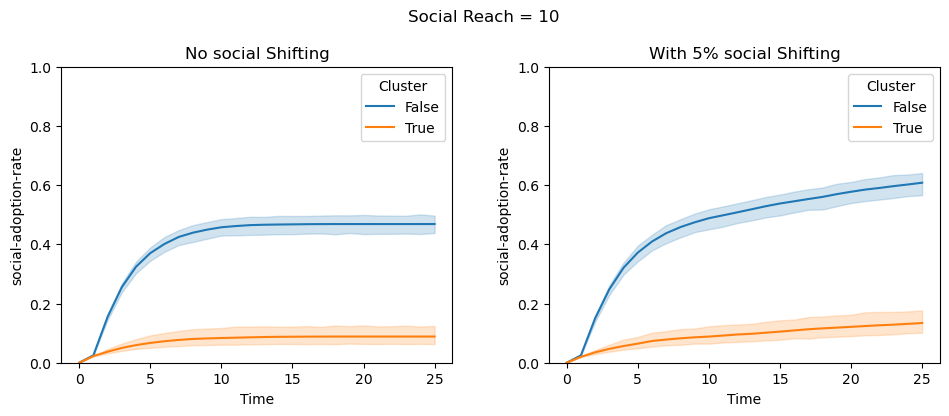

In [41]:
fig, axs = plt.subplots(1,2, dpi=100)
fig.suptitle('Social Reach = 10')
axs[0].set_ylim(0,1); axs[0].set_title("No social Shifting")
axs[1].set_ylim(0,1); axs[1].set_title(r"With 5% social Shifting")
fig.tight_layout(); fig.set_figwidth(10)

sns.lineplot(data=small_social_distance_no_shifting, x="Time", y="social-adoption-rate", hue="Cluster", ax = axs[0])
sns.lineplot(data=small_social_distance_with_shifting, x="Time", y="social-adoption-rate", hue="Cluster", ax = axs[1])

<style>
    img {
        width : 60%;
    }
</style>

Compare to textbook

![EXP1](./Figure/Exp1_text.png)

In [23]:
# Experiment_2, Larger Social Reach
exp_2 = pd.DataFrame()

"""
No social shifting, clustered
"""
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 15, clustered = True, social_shifting = 0)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0, clustered = True)
    exp_2 = pd.concat([exp_2, sim_df], axis=0)


"""
No social shifting, scattered
"""
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 15, clustered = False, social_shifting = 0)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0, clustered = False)
    exp_2 = pd.concat([exp_2, sim_df], axis=0)

"""
Social shifting, clustered
"""   
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 15, clustered = True, social_shifting = 0.05)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0.05, clustered = True)
    exp_2 = pd.concat([exp_2, sim_df], axis=0)


"""
Social shifting, scattered
""" 
for i in tqdm(range(30)):
    setup()
    set_infection_mode(social_reach = 15, clustered = False, social_shifting = 0.05)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_infection_df(sim_df, i, social_shifting = 0.05, clustered = False)
    exp_2 = pd.concat([exp_2, sim_df], axis=0)

100%|██████████| 30/30 [00:28<00:00,  1.04it/s]


In [24]:
large_social_distance_no_shifting = exp_2[exp_2["Social Shifting"] == 0].reset_index()
large_social_distance_with_shifting = exp_2[exp_2["Social Shifting"] != 0].reset_index()

<AxesSubplot:title={'center':'With 5% social Shifting'}, xlabel='Time', ylabel='social-adoption-rate'>

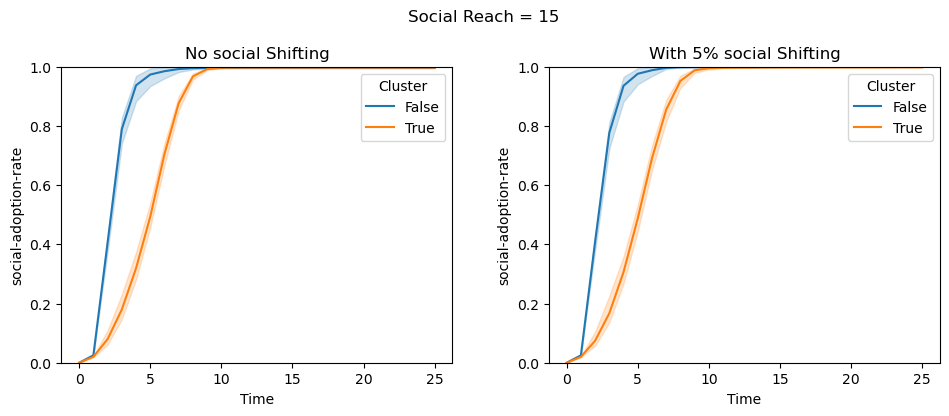

In [43]:
fig2, axs2 = plt.subplots(1,2, dpi = 100)
fig2.suptitle('Social Reach = 15')
axs2[0].set_ylim(0,1); axs2[0].set_title("No social Shifting")
axs2[1].set_ylim(0,1); axs2[1].set_title(r"With 5% social Shifting")
fig2.tight_layout(); fig2.set_figwidth(10)

sns.lineplot(data=large_social_distance_no_shifting, x="Time", y="social-adoption-rate", hue="Cluster", ax = axs2[0])
sns.lineplot(data=large_social_distance_with_shifting, x="Time", y="social-adoption-rate", hue="Cluster", ax = axs2[1])

<style>
    img {
        width : 60%;
    }
</style>

Compare to textbook

![EXP2](./Figure/Exp2_text.png)

In [6]:
# Experiment_3
exp_3 = pd.DataFrame()

"""
Threshold Normally Distributed
"""
for i in tqdm(range(30)):
    setup()
    set_influence_mode(social_reach = 30, clustered = True, social_shifting = 0.05)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_influence_df(sim_df, i, social_shifting = 0.05, threshold_clustered = True)
    exp_3 = pd.concat([exp_3, sim_df], axis=0)


"""
Threshold Uniformly Distributed
"""
for i in tqdm(range(30)):
    setup()
    set_influence_mode(social_reach = 30,  clustered= False, social_shifting = 0.05)

    sim_df = netlogo.repeat_report(["social-adoption-rate"], 25)
    sim_df = tidy_influence_df(sim_df, i, social_shifting = 0.05, threshold_clustered = False)
    exp_3 = pd.concat([exp_3, sim_df], axis=0)


100%|██████████| 30/30 [01:48<00:00,  3.61s/it]


In [7]:
exp_3

,Time,social-adoption-rate,Simulation No.,Threshold Normal,Social Shifting
0,0.0,0.0,0,True,0.05
1,1.0,0.025,0,True,0.05
2,2.0,0.025,0,True,0.05
3,3.0,0.025,0,True,0.05
4,4.0,0.025,0,True,0.05
...,...,...,...,...,...
21,21.0,0.126,29,False,0.05
22,22.0,0.128,29,False,0.05
23,23.0,0.128,29,False,0.05
24,24.0,0.128,29,False,0.05


<AxesSubplot:xlabel='Time', ylabel='social-adoption-rate'>

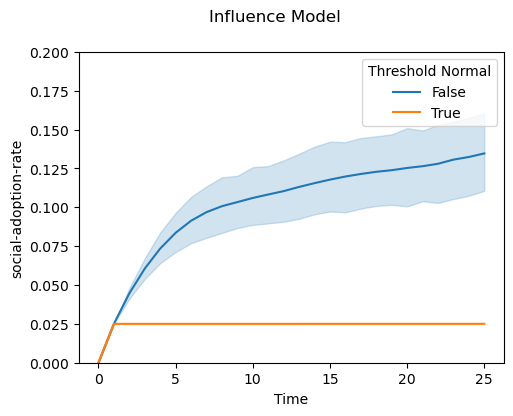

In [11]:
fig3, axs3 = plt.subplots(dpi = 100)
fig3.suptitle('Influence Model')
axs3.set_ylim(0,0.2)
fig3.tight_layout(); fig3.set_figwidth(5)

sns.lineplot(data=exp_3.reset_index(), x="Time", y="social-adoption-rate", hue="Threshold Normal", ax = axs3)



<style>
    img {
        width : 50%;
    }
</style>

Compare to textbook

![EXP3](./Figure/Exp3_text.png)